# Template for Gaussian NaiveBayes Comparison

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

from sklearn.model_selection import cross_validate, KFold

In [3]:
np.random.seed(0)

## Assessment of the Gaussian Naive Bayes Classifier

In [4]:
def classifier_assessment(X, y, priors=None):
    """
    GaussianNB comparison for the different datasets

    args: X dataset of features
          y target set of values for classification

    returns: 
        - a dummy classifier score using "most frequent" value assignment
        - the mean of the Gaussian NaiveBayes Claffifier prediction scores taken from a 
          5 fold cross validation on the dataset
    """
    
    clf_nb = GaussianNB(priors=priors)
    
    print(f"Using prior probability: {priors}")
    
    def performance_graphics(X=X, y=y, clf=clf_nb):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
        clf.fit(X_train, y_train)
     
        proba_ = clf.predict_proba(X_test)[:, 1]

        precision, recall, thresholds = precision_recall_curve(y_test, proba_)
        fp, tp, thresholds_roc = roc_curve(y_test, proba_)
        
        auc_score = np.round(roc_auc_score(y_test, proba_), 4)

        close_default = np.argmin(np.abs(thresholds - 0.5))
        close_zero = np.argmin(np.abs(thresholds_roc))

        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 4))

        ax1.plot(precision, recall, label="Precision Recall Curve")
        ax1.plot(precision[close_default], 
                 recall[close_default], 'o', 
                 c='r', markersize=10, 
                 label='threshold 0.5', 
                 fillstyle="none", mew=2)
        ax1.set_title("RF performance")
        ax1.set_xlabel("Precision")
        ax1.set_ylabel("Recall")
        ax1.legend(loc='best')

        ax2.plot(fp, tp, label="ROC curve")
        ax2.plot(fp[close_zero], 
                 tp[close_zero], 'o', 
                 c='r', markersize=10, 
                 label='threshold 0', 
                 fillstyle="none", mew=2)
        ax2.set_title(f"ROC performance: AUC Score {auc_score}")
        ax2.set_xlabel("False Positive Rate")
        ax2.set_ylabel("True Positive (Recall)")
        ax2.legend(loc='best')

        plt.show();

    kfold = KFold(n_splits=5)
    cross_val = cross_validate(clf_nb, X, y, cv=kfold, return_estimator=True)
    mean_score = cross_val['test_score'].mean()
        
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X,y)
    d_score = dummy_clf.score(X,y)
    
    graphic = performance_graphics

    return d_score, mean_score, graphic

# Compare Datasets

Leave commented until all values are in scope, then uncomment and compare. 

In [5]:
y = pd.read_csv('./y_all.csv')
# y = pd.read_csv('./y_high.csv')
# y = pd.read_csv('./y_mid.csv')
# y = pd.read_csv('./y_low.csv')


# all recognizes target as a string, others as boolean
y = y.apply(lambda x: 1 if x['target'] == 'True' else 0, axis=1)
y

0      0
1      1
2      1
3      1
4      1
      ..
591    0
592    0
593    0
594    0
595    0
Length: 596, dtype: int64

In [6]:
X = pd.read_csv('./X_all.csv')
# X = pd.read_csv('./X_high.csv')
# X = pd.read_csv('./X_mid.csv')
#X = pd.read_csv('./X_low.csv')
X = X.fillna(0)
X.head()

,Unnamed: 0,id,number_in_season,number_in_series,original_air_year,season,us_viewers_in_millions,views,Homer Simpson,Marge Simpson,...,Artie Ziff,George H.W. Bush,Director,Scratchy,Marty,Salesman,Dan Gillick,Larry,Dr. Marvin Monroe,Clerk
0,0,10,10.0,10.0,1990.0,1.0,30.3,50816.0,73.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1,12,12.0,12.0,1990.0,1.0,30.4,62561.0,31.0,11.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,14,1.0,14.0,1990.0,2.0,33.6,59575.0,23.0,15.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
3,3,17,4.0,17.0,1990.0,2.0,26.1,64959.0,45.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,19,6.0,19.0,1990.0,2.0,25.4,50691.0,91.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
d_score, mean_score, graphic = classifier_assessment(X, y)

Using prior probability: None


In [8]:
d_score, mean_score

(0.5989932885906041, 0.8053641456582632)

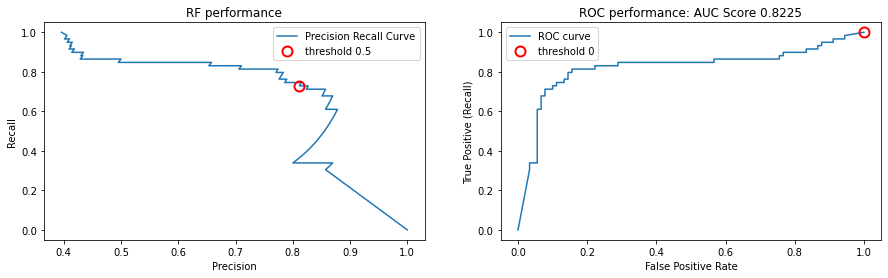

In [9]:
graphic()